In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

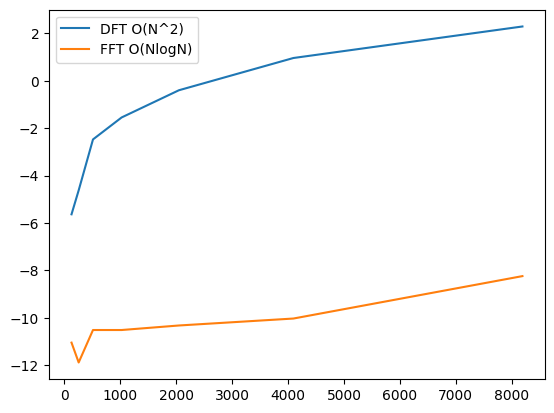

In [2]:
# ex1

def dft(N, x):
    w = np.e ** (-2 * np.pi * 1j / N)

    fourierMatrix = np.zeros((N, N), dtype=complex)

    for i in range(N):
        for j in range(N):
            fourierMatrix[i, j] = w ** (i * j)
            
    return np.dot(fourierMatrix, x)

time_dft = []
time_fft = []
for N in [128, 256, 512, 1024, 2048, 4096, 8192]:
    sine = np.sin(2 * np.pi * np.linspace(0, 1, N))
    
    start_dft = time.time()
    dft(N, sine)
    end_dft = time.time()
    
    time_dft.append(end_dft - start_dft)
    
    start_fft = time.time()
    np.fft.fft(sine)
    end_fft = time.time()
    
    time_fft.append(end_fft - start_fft)


plt.plot([128, 256, 512, 1024, 2048, 4096, 8192], np.log(time_dft), label="DFT O(N^2)")
plt.plot([128, 256, 512, 1024, 2048, 4096, 8192], np.log(time_fft), label="FFT O(NlogN)")
plt.legend()

plt.savefig("dft_vs_fft.pdf")
plt.show()

/var/folders/xv/w6vjg90x4pd72d9mbrnc1v6h0000gn/T/ipykernel_2573/179566716.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


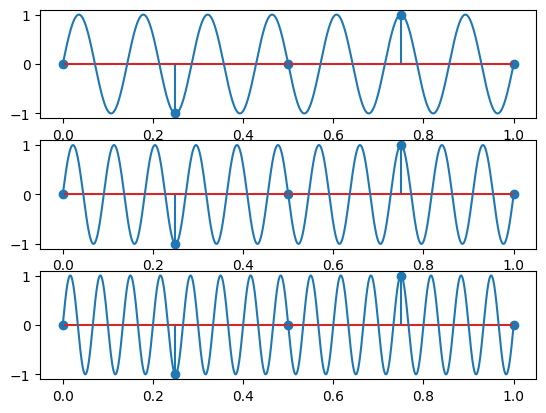

In [11]:
# ex2

# frecventa de esantionare este 4, nu 5, daca nu folosesc endpoint=False
discreteTime = np.linspace(0, 1, 5)

continuousTime = np.linspace(0, 1, 10000)

def getSine(freq, axis):
    return np.sin(2 * np.pi * freq * axis)
    
fig, axs = plt.subplots(3)


axs[0].stem(discreteTime, getSine(7, discreteTime))
axs[0].plot(continuousTime, getSine(7, continuousTime))

axs[1].stem(discreteTime, getSine(7, discreteTime))
axs[1].plot(continuousTime, getSine(11, continuousTime))

axs[2].stem(discreteTime, getSine(7, discreteTime))
axs[2].plot(continuousTime, getSine(15, continuousTime))

fig.show()

/var/folders/xv/w6vjg90x4pd72d9mbrnc1v6h0000gn/T/ipykernel_2573/1799495982.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


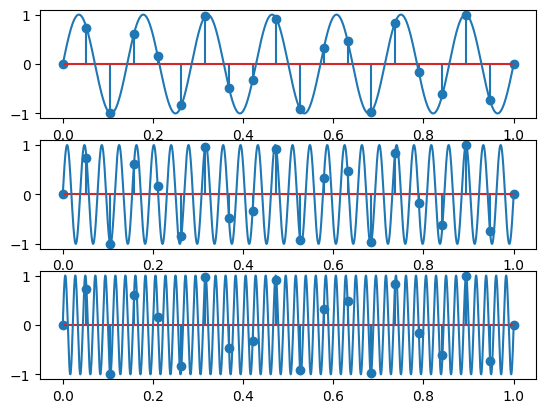

In [13]:
# ex3

# frecventa de esantionare este 19, nu 20, daca nu folosesc endpoint=False
discreteTime = np.linspace(0, 1, 20)

continuousTime = np.linspace(0, 1, 10000)

def getSine(freq, axis):
    return np.sin(2 * np.pi * freq * axis)
    
fig, axs = plt.subplots(3)


axs[0].stem(discreteTime, getSine(7, discreteTime))
axs[0].plot(continuousTime, getSine(7, continuousTime))

axs[1].stem(discreteTime, getSine(7, discreteTime))
axs[1].plot(continuousTime, getSine(7 + 19 * 1, continuousTime))

axs[2].stem(discreteTime, getSine(7, discreteTime))
axs[2].plot(continuousTime, getSine(7 + 19 * 2, continuousTime))

fig.show()

In [ ]:
#ex 4

# 2 * frecventa maxima = 2 * 200 = 400 Hz

In [ ]:
#ex5

In [ ]:
# ex6

In [ ]:
# ex7

# 10 log ps/pz = 80

# 10 * log 90/pz = 80

# log 90 - log pz = 8
# log9 + 1 - logpz = 8
# log9 - 7 = logpz

# 10 ** (log9 - 7) = pz

# 9 * 10 ^ (- 7) = pz